In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt 

In [4]:
import seaborn as sns 

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [6]:
from sklearn.linear_model import LogisticRegression 
loreg=LogisticRegression()

In [7]:
from sklearn import metrics

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
titanic=pd.read_csv("titanic.csv",encoding="ISO-8859-1")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [11]:
titanic.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [12]:

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [13]:
titanic.sex = titanic.sex.map({'male':0, 'female':1})
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",1.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",0.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",1.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [14]:
titanic.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [15]:
titanic["embarked"].fillna("S",inplace=True)
titanic["embarked"].isnull().sum()

0

In [16]:
titanic["age"].fillna(titanic["age"].median(),inplace=True)
titanic["age"].isnull().sum()

0

In [17]:
titanic.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age             0
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        0
boat          824
body         1189
home.dest     565
dtype: int64

In [18]:
titanic.survived.fillna(0.0,inplace=True)
titanic.survived.isnull().sum()

0

In [19]:
titanic.sex.fillna(1,inplace=True)


In [20]:
titanic.sibsp.fillna((titanic["sibsp"].median()),inplace=True)


In [21]:
titanic.pclass.fillna((titanic["pclass"].median()),inplace=True)

In [22]:
titanic.parch.fillna((titanic["parch"].median()),inplace=True)

In [23]:
K=titanic["ticket"].mode()
K

0    CA. 2343
dtype: object

In [24]:
titanic.ticket.fillna("CA. 2343",inplace=True)
titanic.ticket.isnull().sum()

0

In [25]:
titanic.fare.fillna((titanic["fare"].mean()),inplace=True)

In [26]:
titanic.isnull().sum()

pclass          0
survived        0
name            1
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1015
embarked        0
boat          824
body         1189
home.dest     565
dtype: int64

In [27]:
titanic.drop(["cabin","boat","body","home.dest"],axis=1,inplace=True)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",1.0,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",0.0,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",1.0,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0.0,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1.0,25.0000,1.0,2.0,113781,151.5500,S


In [28]:
titanic.isnull().sum()

pclass      0
survived    0
name        1
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [29]:
titanic.dropna(axis=0,how='any',inplace=True)
titanic.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [30]:
titanic["embarked"].value_counts()

S    916
C    270
Q    123
Name: embarked, dtype: int64

In [31]:
titanic.embarked = titanic.embarked.map({'S':0, 'C':1,'Q':2})
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",1.0,29.0000,0.0,0.0,24160,211.3375,0
1,1.0,1.0,"Allison, Master. Hudson Trevor",0.0,0.9167,1.0,2.0,113781,151.5500,0
2,1.0,0.0,"Allison, Miss. Helen Loraine",1.0,2.0000,1.0,2.0,113781,151.5500,0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0.0,30.0000,1.0,2.0,113781,151.5500,0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1.0,25.0000,1.0,2.0,113781,151.5500,0


In [32]:
titanic.corr()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
pclass,1.000000,-0.312469,-0.124617,-0.377908,0.060832,0.018322,-0.558477,0.038875
survived,-0.312469,1.000000,0.528693,-0.043818,-0.027825,0.082660,0.244208,0.098450
sex,-0.124617,0.528693,1.000000,-0.053664,0.109609,0.213125,0.185484,0.120423
age,-0.377908,-0.043818,-0.053664,1.000000,-0.189972,-0.125851,0.178859,0.018654
sibsp,0.060832,-0.027825,0.109609,-0.189972,1.000000,0.373587,0.160224,-0.073461
parch,0.018322,0.082660,0.213125,-0.125851,0.373587,1.000000,0.221522,-0.095523
fare,-0.558477,0.244208,0.185484,0.178859,0.160224,0.221522,1.000000,0.061118
embarked,0.038875,0.098450,0.120423,0.018654,-0.073461,-0.095523,0.061118,1.000000


In [33]:
x=titanic[["sex"]]
y=titanic[["survived"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
loreg.fit(x_train,y_train)

C:\Users\Kmar\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kmar\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred=loreg.predict(x_test)

In [35]:
loreg.score(x_test,y_test)

0.7595419847328244

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[129  25]
 [ 38  70]]


In [37]:
titanic["sex"]=titanic["sex"].astype(np.int32)
titanic["sex"].dtype

dtype('int32')

In [38]:
titanic["survived"]=titanic["survived"].astype(np.int32)
titanic["sex"].dtype

dtype('int32')

TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

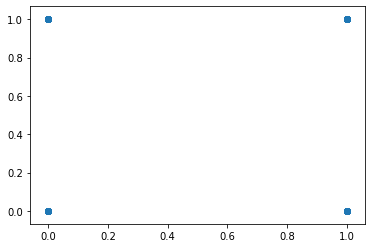

In [40]:
sns.regplot(x="sex",y="survived",data=titanic,logistic=True)

i coldn't fix this code unfortunately

In [41]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80       154
         1.0       0.74      0.65      0.69       108

    accuracy                           0.76       262
   macro avg       0.75      0.74      0.75       262
weighted avg       0.76      0.76      0.76       262



A useful tool when predicting the probability of a binary outcome is the Receiver Operating Characteristic curve, or ROC curve.

It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate.

The true positive rate is calculated as the number of true positives divided by the sum of the number of true positives and the number of false negatives. It describes how good the model is at predicting the positive class when the actual outcome is positive.

The ROC curve is a useful tool for a few reasons:

The curves of different models can be compared directly in general or for different thresholds.
The area under the curve (AUC) can be used as a summary of the model skill.


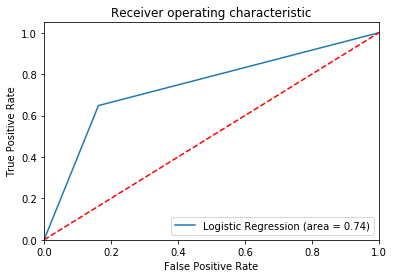

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, loreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
the area under the curve is the auc and it represents the concordance 

it ranges from 1, corresponding to perfect discrimination, to 0.5, corresponding to a model with no discrimination ability. The area under the ROC curve is also sometimes referred to as the c-statistic (c for concordance).

in our case, the  roc curve in deviated to the upper lifet side which means our modelis good enoug and the auc is pretty high and it is closer to 1 (the surface underneath the curve is greater than half the rectangular surface)